# Problem 2

In [231]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Function: `perceptron`

This function implements the **Perceptron algorithm**, which is a linear classifier for binary classification. The algorithm adjusts weights iteratively based on classification mistakes until the data is linearly separable or the maximum number of epochs is reached.

### Parameters
- **`X`**: A `numpy` array of shape `(n_samples, n_features)` representing the input features, where:
  - `n_samples` is the number of data points.
  - `n_features` is the number of features per data point.
- **`y`**: A `numpy` array of shape `(n_samples,)` containing the labels for the data points. Labels must be either `+1` or `-1` for the algorithm to function correctly.
- **`max_epochs`**: (Optional) An integer specifying the maximum number of passes (epochs) over the entire dataset. Default is 100.

### Returns
- **`w`**: A `numpy` array representing the final weight vector after training.
- **`m`**: An integer representing the total number of classification mistakes made during the training process.


In [232]:
 def perceptron(X, y, max_epochs=100):
        
    w = np.zeros(X.shape[1])  
    m = 0                     

    for epoch in range(max_epochs):
        for i in range(len(X)):
            if y[i] * (np.dot(w, X[i])) <= 0:  
                w += y[i] * X[i]  
                m += 1            
    
    return w, m

## Function: `calculate_margin`

This function computes the **true maximum margin** for a given weight vector `w`, dataset `X`, and labels `y`. The margin is a key concept in machine learning, particularly in support vector machines (SVMs), representing the smallest distance between the decision boundary and the closest data point.

---

### Parameters
- **`X`**: A `numpy` array of shape `(n_samples, n_features)` representing the input features.
  - `n_samples`: Number of data points.
  - `n_features`: Number of features per data point.
- **`y`**: A `numpy` array of shape `(n_samples,)` containing the labels for the data points. Labels must be `+1` or `-1`.
- **`w`**: A `numpy` array representing the weight vector obtained from a model (e.g., Perceptron or SVM).

---

### Returns
- **`margin`**: A float value representing the **true maximum margin**, defined as the smallest margin value among all data points.



In [233]:
def calculate_margin(X, y, w):

    margins = [y[i] * np.dot(w, X[i]) / np.linalg.norm(w) for i in range(len(X))]
    return np.min(margins)

## Function: `plot_data_and_boundary`

This function visualizes a dataset and plots the decision boundary derived from a given weight vector `w`. It provides a graphical interpretation of the classification task, making it easier to understand the separation of classes.

---

### Parameters
- **`X`**: A `numpy` array of shape `(n_samples, n_features)` representing the input features.
  - `n_samples`: Number of data points.
  - `n_features`: Number of features per data point (should be at least 2 for visualization purposes).
- **`y`**: A `numpy` array of shape `(n_samples,)` containing the labels for the data points. Labels must be either `+1` or `-1`.
- **`w`**: A `numpy` array representing the weight vector that defines the decision boundary.


In [234]:
def plot_data_and_boundary(X, y, w):
    # Separate the data by class
    pos_class = X[y == 1]
    neg_class = X[y == -1]

    # Plot data points
    plt.scatter(pos_class[:, 0], pos_class[:, 1], color='blue', label='setosa (+1)')
    plt.scatter(neg_class[:, 0], neg_class[:, 1], color='red', label='versicolor (-1)')

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = -(w[0] / w[1]) * x_vals  
    plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')

    # Add labels and legend
    plt.xlabel('Feature 2')
    plt.ylabel('Feature 3')
    plt.title('Data Visualization with Decision Boundary')
    plt.legend()
    plt.grid()
    plt.show()

### Step 1: Load and preprocess the data

In [235]:
file_path = "/Users/twmrgwzln/Downloads/iris.txt"

### Step 2: Read dataset and split columns

In [236]:
data = pd.read_csv(file_path, header=None)
data = data[0].str.split(expand=True)
data.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Flower Type"]
print(data)

    Feature1 Feature2 Feature3 Feature4     Flower Type
0        5.1      3.5      1.4      0.2     Iris-setosa
1        4.9      3.0      1.4      0.2     Iris-setosa
2        4.7      3.2      1.3      0.2     Iris-setosa
3        4.6      3.1      1.5      0.2     Iris-setosa
4        5.0      3.6      1.4      0.2     Iris-setosa
..       ...      ...      ...      ...             ...
145      6.7      3.0      5.2      2.3  Iris-virginica
146      6.3      2.5      5.0      1.9  Iris-virginica
147      6.5      3.0      5.2      2.0  Iris-virginica
148      6.2      3.4      5.4      2.3  Iris-virginica
149      5.9      3.0      5.1      1.8  Iris-virginica

[150 rows x 5 columns]


### Step 3: Filter Setosa and virginica

In [237]:
filtered_data = data[data["Flower Type"].isin(["Iris-setosa", "Iris-versicolor"])].copy()
filtered_data["Label"] = filtered_data["Flower Type"].map({"Iris-setosa": 1, "Iris-versicolor": -1})
filtered_data.head()

,Feature1,Feature2,Feature3,Feature4,Flower Type,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


### Step 4: Extract features and labels

In [238]:
X = filtered_data[["Feature2", "Feature3"]].astype(float).values
y = filtered_data["Label"].values

### Step 5: Run Perceptron


In [239]:
final_w, total_mistakes = perceptron(X, y)
true_margin = calculate_margin(X, y, final_w)

### Step 6: Return results

In [240]:
print("Final weight vector (w):", final_w)
print("Total mistakes made:", total_mistakes)
print("True maximum margin:", true_margin)


Final weight vector (w): [ 4.1 -5.2]
Total mistakes made: 5
True maximum margin: 0.40320551388964704


### Step 7: Visualize the dataset and the decision boundary

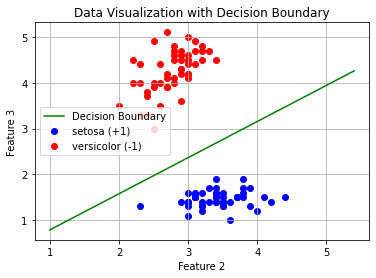

In [241]:
plot_data_and_boundary(X, y, final_w)

### Step 1: Load and preprocess the data

In [242]:
file_path = "/Users/twmrgwzln/Downloads/iris.txt"

### Step 2: Read dataset and split columns

In [243]:
data = pd.read_csv(file_path, header=None)
data = data[0].str.split(expand=True)
data.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Flower Type"]
print(data)

    Feature1 Feature2 Feature3 Feature4     Flower Type
0        5.1      3.5      1.4      0.2     Iris-setosa
1        4.9      3.0      1.4      0.2     Iris-setosa
2        4.7      3.2      1.3      0.2     Iris-setosa
3        4.6      3.1      1.5      0.2     Iris-setosa
4        5.0      3.6      1.4      0.2     Iris-setosa
..       ...      ...      ...      ...             ...
145      6.7      3.0      5.2      2.3  Iris-virginica
146      6.3      2.5      5.0      1.9  Iris-virginica
147      6.5      3.0      5.2      2.0  Iris-virginica
148      6.2      3.4      5.4      2.3  Iris-virginica
149      5.9      3.0      5.1      1.8  Iris-virginica

[150 rows x 5 columns]


### Step 3: Filter Setosa and virginica

In [244]:
filtered_data = data[data["Flower Type"].isin(["Iris-setosa", "Iris-virginica"])].copy()
filtered_data["Label"] = filtered_data["Flower Type"].map({"Iris-setosa": 1, "Iris-virginica": -1})
filtered_data.head()

,Feature1,Feature2,Feature3,Feature4,Flower Type,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


### Step 4: Extract features and labels

In [245]:
X = filtered_data[["Feature2", "Feature3"]].astype(float).values
y = filtered_data["Label"].values

### Step 5: Run Perceptron & Calculate the true maximum margin

In [246]:
final_w, total_mistakes = perceptron(X, y)
true_margin = calculate_margin(X, y, final_w)

### Step 6: Return results

In [247]:
print("Final weight vector (w):", final_w)
print("Total mistakes made:", total_mistakes)
print("True maximum margin:", true_margin)


Final weight vector (w): [ 3.7 -3.2]
Total mistakes made: 3
True maximum margin: 0.8708397607151707


### Step 7: Visualize the dataset and the decision boundary

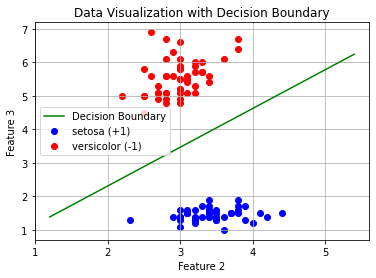

In [248]:
plot_data_and_boundary(X, y, final_w)

# Problem 3

In [249]:
# Python Version: 3.8

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Function: `find_lines`

This function computes the parameters for all unique lines that can be formed by pairs of points in a 2D or higher-dimensional space. Each line is represented in terms of a weight vector `w` and a bias term `b`, based on the line's equation.

---

### Parameters
- **`points`**: A `numpy` array of shape `(n_points, n_dimensions)` representing the coordinates of the points.
  - `n_points`: The number of points in the dataset.
  - `n_dimensions`: The dimensionality of each point (e.g., 2 for 2D, 3 for 3D).

---

### Returns
- **`lines`**: A list of tuples, where each tuple `(w, b)` represents a unique line:
  - **`w`**: A `numpy` array representing the weight vector (direction of the line).
  - **`b`**: A float representing the bias term of the line.


In [250]:
def find_lines(points):
    lines = []
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            p1, p2 = points[i], points[j]
            w = p2 - p1
            b = -np.dot(w, (p1 + p2) / 2)
            lines.append((w, b))
    return lines


## Function: `classify_line`

This function classifies a set of points relative to a given line. The classification is determined by the line's parameters \( w \) and \( b \), and the sign of the computed result indicates on which side of the line each point lies.

---

### Parameters
- **`line`**: A tuple `(w, b)` where:
  - **`w`**: A `numpy` array representing the weight vector (direction of the line).
  - **`b`**: A scalar representing the bias term of the line.
- **`points`**: A `numpy` array of shape `(n_points, n_dimensions)` representing the points to be classified.
  - `n_points`: The number of points.
  - `n_dimensions`: The dimensionality of each point (should match the dimensions of `w`).

---

### Returns
- **`classification`**: A `numpy` array of shape `(n_points,)` where each element is:
  - `+1`: If the point lies on one side of the line.
  - `-1`: If the point lies on the other side of the line.
  - `0`: If the point lies exactly on the line.



In [251]:
def classify_line(line, points):
    w, b = line
    return np.sign(np.dot(points, w) + b)


## Function: `adaboost`

This function implements the **AdaBoost** (Adaptive Boosting) algorithm for binary classification. AdaBoost combines multiple weak classifiers (in this case, decision boundaries defined by lines) to form a strong classifier by iteratively updating weights and combining hypotheses based on their accuracy.

---

### Parameters
- **`S`**: A `numpy` array of shape `(n_samples, n_features)` representing the training dataset.
- **`T`**: A `numpy` array of shape `(n_test_samples, n_features)` representing the test dataset.
- **`labels_S`**: A `numpy` array of shape `(n_samples,)` containing the training labels (`+1` or `-1`).
- **`labels_T`**: A `numpy` array of shape `(n_test_samples,)` containing the test labels (`+1` or `-1`).
- **`num_hypotheses`**: An integer specifying the number of weak classifiers to combine. Default is 8.

---

### Returns
- **`train_errors`**: A list containing the training error for each iteration of the AdaBoost algorithm.
- **`test_errors`**: A list containing the test error for each iteration of the AdaBoost algorithm.



In [252]:
def adaboost(S, T, labels_S, labels_T, num_hypotheses=8):
    n = len(S)
    weights = np.ones(n) / n
    lines = find_lines(S)
    hypotheses = []
    alpha = []

    # Train AdaBoost
    for k in range(num_hypotheses):
        best_error = float("inf")
        best_line = None

        for line in lines:
            predictions = classify_line(line, S)
            weighted_error = np.sum(weights * (predictions != labels_S))

            if weighted_error < best_error:
                best_error = weighted_error
                best_line = line

        # Compute alpha and update weights
        alpha_k = 0.5 * np.log((1 - best_error) / max(best_error, 1e-10))
        predictions = classify_line(best_line, S)
        weights *= np.exp(-alpha_k * labels_S * predictions)
        weights /= np.sum(weights)

        hypotheses.append(best_line)
        alpha.append(alpha_k)

    # Calculate training and test errors for each k
    train_errors = []
    test_errors = []
    for k in range(1, num_hypotheses + 1):
        combined_train = np.sign(
            np.sum([alpha[i] * classify_line(hypotheses[i], S) for i in range(k)], axis=0)
        )
        combined_test = np.sign(
            np.sum([alpha[i] * classify_line(hypotheses[i], T) for i in range(k)], axis=0)
        )

        train_errors.append(1 - accuracy_score(labels_S, combined_train))
        test_errors.append(1 - accuracy_score(labels_T, combined_test))

    return train_errors, test_errors

### Step 1: Load and preprocess the data

In [253]:
data = pd.read_csv(data_path, header=None, delim_whitespace=True)
data.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Label"]
print(data)

     Feature1  Feature2  Feature3  Feature4           Label
0         5.1       3.5       1.4       0.2     Iris-setosa
1         4.9       3.0       1.4       0.2     Iris-setosa
2         4.7       3.2       1.3       0.2     Iris-setosa
3         4.6       3.1       1.5       0.2     Iris-setosa
4         5.0       3.6       1.4       0.2     Iris-setosa
..        ...       ...       ...       ...             ...
145       6.7       3.0       5.2       2.3  Iris-virginica
146       6.3       2.5       5.0       1.9  Iris-virginica
147       6.5       3.0       5.2       2.0  Iris-virginica
148       6.2       3.4       5.4       2.3  Iris-virginica
149       5.9       3.0       5.1       1.8  Iris-virginica

[150 rows x 5 columns]


### Step 2: Filter Versicolor and Virginica

In [254]:
filtered_data = data[data["Label"].isin(["Iris-versicolor", "Iris-virginica"])]
filtered_data["Label"] = filtered_data["Label"].map({"Iris-versicolor": 1, "Iris-virginica": -1})
filtered_data.head()

,Feature1,Feature2,Feature3,Feature4,Label
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


### Step 3: Extract features and labels

In [255]:
X = filtered_data[["Feature2", "Feature3"]].values
y = filtered_data["Label"].values

### Step 4: Run AdaBoost 100 times

In [256]:
num_runs = 100
train_errors_avg = np.zeros(8)
test_errors_avg = np.zeros(8)

for _ in range(num_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=None)
    train_errors, test_errors = adaboost(X_train, X_test, y_train, y_test)
    train_errors_avg += np.array(train_errors)
    test_errors_avg += np.array(test_errors)

train_errors_avg /= num_runs
test_errors_avg /= num_runs

### Step 5: Display results


In [257]:
print("Average Empirical Error (Train):", train_errors_avg)
print("Average True Error (Test):", test_errors_avg)


Average Empirical Error (Train): [0.0462 0.048  0.0392 0.0382 0.0294 0.0302 0.025  0.0204]
Average True Error (Test): [0.1028 0.1026 0.0986 0.0982 0.1008 0.102  0.1022 0.1046]


### Step 6: Plot results


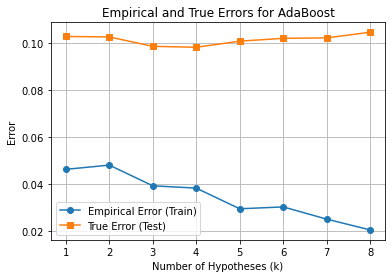

In [258]:
plt.plot(range(1, 9), train_errors_avg, label="Empirical Error (Train)", marker="o")
plt.plot(range(1, 9), test_errors_avg, label="True Error (Test)", marker="s")
plt.xlabel("Number of Hypotheses (k)")
plt.ylabel("Error")
plt.title("Empirical and True Errors for AdaBoost")
plt.legend()
plt.grid()
plt.show()